In [33]:
"""
Jupyter notebook contains project for
Exploratory Data Analysis (EDA) on Titanic dataset and explores correlation and addresses few below questions.
● What is the most important factor in determining survival of the Titanic incident?
● In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
● “Women and children first”. Was this the case?
● Add one other observation that can be noted from the dataset.

"""
import pandas as pd
import numpy as np
import sklearn
# Import the necessary data and analysis libraries for performing Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import missingno
# Import these libraries for Graph plotting

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Used sklearn specific library to deal with label encoding, scaling and imputation

%matplotlib inline
# Line of code helpful to save and pan, as using Matplotlib to plot and render interactive plots


In [34]:
df = pd.read_csv("titanic.csv")
df.head()
# Read the dataset and check it is loaded correctly by using the head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
print('The no. of records and columns from the table are: ', df.shape)
print('The datatypes used in the dataset are:')
df.dtypes
# Show total rows (no. of observations), columns (features) and names of columns along with their datatypes

The no. of records and columns from the table are:  (891, 12)
The datatypes used in the dataset are:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [36]:
print('Missing values in dataset: \n\n', df.isnull().sum().sort_values(ascending=False))
# Check number of missing values and arrange them in descending order

Missing values in dataset: 

 Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


<Axes: >

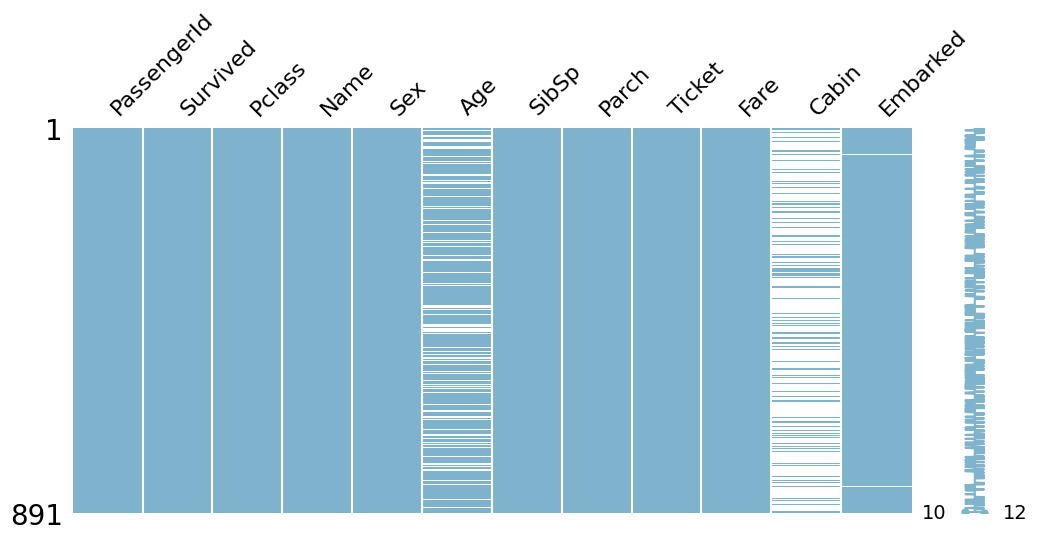

In [37]:
missingno.matrix(df, figsize = (12,5), color = (0.5, 0.7, 0.8))
# Graphic plot of missing values

From the above null table and graph, we notice there are high number of people with missing values for their 'Age' and also large amount of people do not have 'Cabin' details documented. And, there are two values missing for 'Embarked' ports.

In [38]:
df.describe()
# Using describe(), review and get a feel for data using basic statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We note from the basic statistics the mean for column 'Age' is 29.699118 and the median is 28. It is important to note, this is beneficial for analysis of missing age data. Also, the stats are only populated where data type for column is either int or float. To address some of these gaps, as part of EDA character encoding will be required on key features.

In [39]:
missing_emb_df = df[pd.isnull(df.Embarked) == True]
missing_emb_df.head()
# Filter null values from column 'Embarked' and show using head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Addressing the few records where the Embarked port is missing. Features that would provide additional information on the two missing value would be 'Pclass' and 'Fare'. Used the seaborn.FacetGrid graph to understand the relationship between these feature and recommend approach on addressing missing values

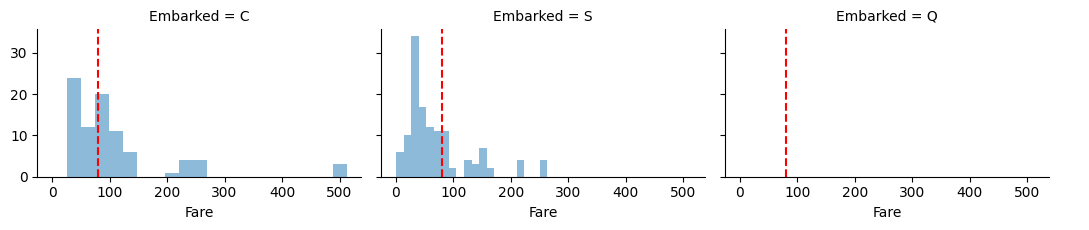

In [40]:
g = sns.FacetGrid(df[df.Pclass == 1], col='Embarked', height=2.4, aspect=1.5)
g.map(plt.hist, 'Fare', alpha=0.5, bins=20).add_legend()
g.map(plt.axvline, x=80.0, color='red', ls='dashed')
# Used Seaborn FacetGrid to show comparison of Pclass with Fare from different ports

We can establish although Southampton was a popular port, there was larger proportion of passenger with first class ticket and higher fare boarded from Cherbourg. Hence, will assign C to the two missing values.

In [41]:
df['Embarked'] = df['Embarked'].fillna('C')
# Two missing values, assign Cherbourg (C) as departure port.

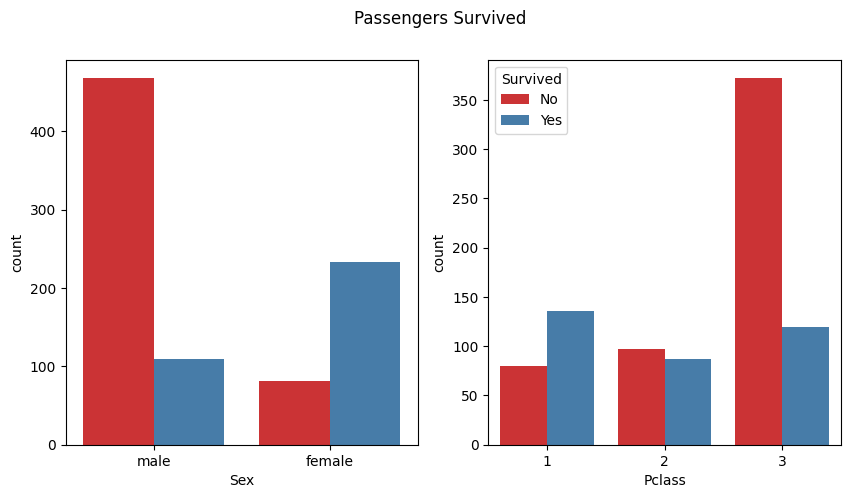

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Passengers Survived')

sns.countplot(ax=axes[0], x='Sex', hue = 'Survived', data = df, palette='Set1', legend=False)
# Used countplot to show how many people survived from different gender using 'Sex' column.

sns.countplot(ax=axes[1], x="Pclass", hue = 'Survived', data = df, palette='Set1', legend=False)
plt.legend(title='Survived', labels=['No', 'Yes'])
# Used countplot to show how many people survived from different passenger classes using 'Pclass' column.


In [43]:
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
# Applying label encoding for column 'Embarked' and 'Sex' for these features with categorical values

df.info() # Applying info(), to view column and datatype information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


Performed encoding on two columns 'Sex' and 'Embarked', with categorical info to align with other key features

In [44]:
df.Cabin.unique()
# Showed column 'Cabin' unique values.

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

As the biggest missing values is Cabin details, most like these are Missing at Random (MaR) and it does not make sense to drop column...it would add huge amount of noise in the dataset. To solve this, will substitute the missing values using lambda function.

In [45]:
df['Cabin'] = df['Cabin'].apply(lambda x: 'X' if pd.isnull(x) or x == 'T' else x)
# Used lambda function to substitute missing values

In [46]:
df['Cabin'] = LabelEncoder().fit_transform(df['Cabin'])
# Applied label encoding for column 'Cabin' as feature with categorical values

In [47]:
imputer = SimpleImputer(strategy='most_frequent')
df.loc[:,['Age']] = imputer.fit_transform(df[['Age']])
# Imputing for missing values in column 'Age', with sklearn simple imputer.

In [48]:
print('Missing values in dataset after updates: \n\n', df.isnull().sum().sort_values(ascending=False))
# Checked again for number of missing values as we have now fixed missing values for Embarked.

Missing values in dataset after updates: 

 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [49]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\\.', expand=False)
df.Title.unique()
# Extract the Title of all the 891 records and identify the unique set of value..it can be seen there are 17 unique values

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [50]:
def passenger_title(df):
    # Function to help replace the Title into a consistent 5 levels
    df.Title = df.Title.replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 
                                 'Col', 'Capt', 'Countess', 'Jonkheer'], 'Other')
    df.Title = df.Title.replace('Mlle', 'Miss')
    df.Title = df.Title.replace('Ms', 'Miss')
    df.Title = df.Title.replace('Mme', 'Mrs')
    
    return df

In [51]:
passenger_title(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,146,2,Other
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,30,2,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,146,2,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,60,0,Mr


In [52]:
print('Unique values in column Title: ',df.Title.unique())
df.head()

Unique values in column Title:  ['Mr' 'Mrs' 'Miss' 'Master' 'Other']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,2,Mr


Total number of passenger with title Mr.  517
Total number of passenger with title Mrs.  126
Total number of passenger with title Miss.  185
Total number of passenger with title Master  40
Total number of passenger with Other titles  23


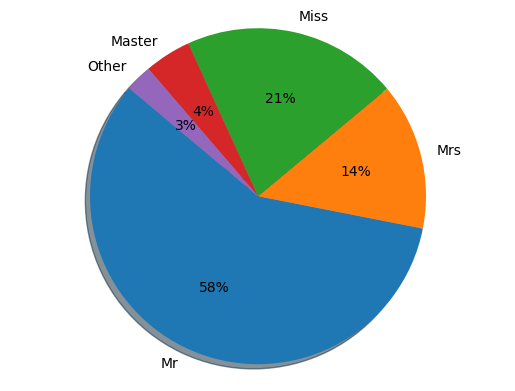

In [53]:
count_Mr= df['Title'].value_counts()['Mr']
print('Total number of passenger with title Mr. ', count_Mr)
count_Mrs= df['Title'].value_counts()['Mrs']
print('Total number of passenger with title Mrs. ', count_Mrs)
count_Miss= df['Title'].value_counts()['Miss']
print('Total number of passenger with title Miss. ', count_Miss)
count_Master= df['Title'].value_counts()['Master']
print('Total number of passenger with title Master ', count_Master)
count_Other= df['Title'].value_counts()['Other']
print('Total number of passenger with Other titles ', count_Other)
# Passenger count as per their title, shows very high male passengers were onboard, important for gender ratio and equity analysis. 

labels = ['Mr', 'Mrs', 'Miss', 'Master', 'Other']
data_title = [count_Mr, count_Mrs, count_Miss, count_Master, count_Other]
pie_title = plt.pie(data_title, labels=labels, autopct='%.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()
# Matplotlib pie chart to show break down of passengers on board in percent. 

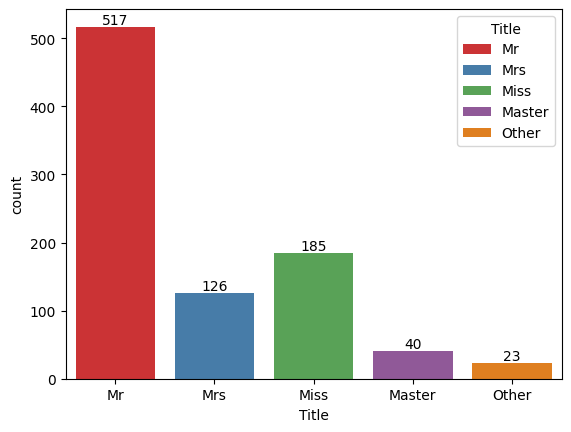

In [54]:
plot_title = sns.countplot(x='Title', hue = 'Title', data = df, palette='Set1', legend=True, stat='count')
for i in plot_title.containers:
    plot_title.bar_label(i)


Seaborn count-plot to shows break down of passengers on board in percent. Later down helpful to map with number of passengers survived, particular seen 'Mrs', 'Miss' and 'Master'

In [55]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)
# Dropped three columns from dataset, to help focus of the target vector 'Survived' and other key Features.

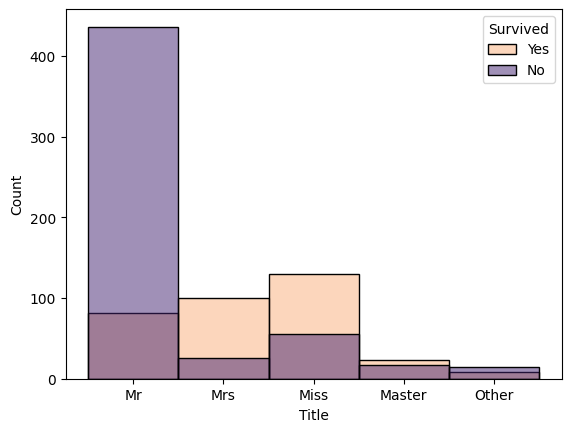

In [56]:
sns.histplot(data= df, x='Title', hue = 'Survived', palette=['#432371',"#FAAE7B"], legend=False)
plt.legend(title='Survived', labels=['Yes', 'No'])
#  Added a count plot showing Title is influenced the number of survival.

Looking at the above count plot, it is evident that survival rate was higher in young people and females as compared to males and older people.

In [57]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5}
# Mapping the 5 titles level from strings to numerical variables.

df.Title = df.Title.map(title_mapping)
df.Title = df.Title.fillna(0)

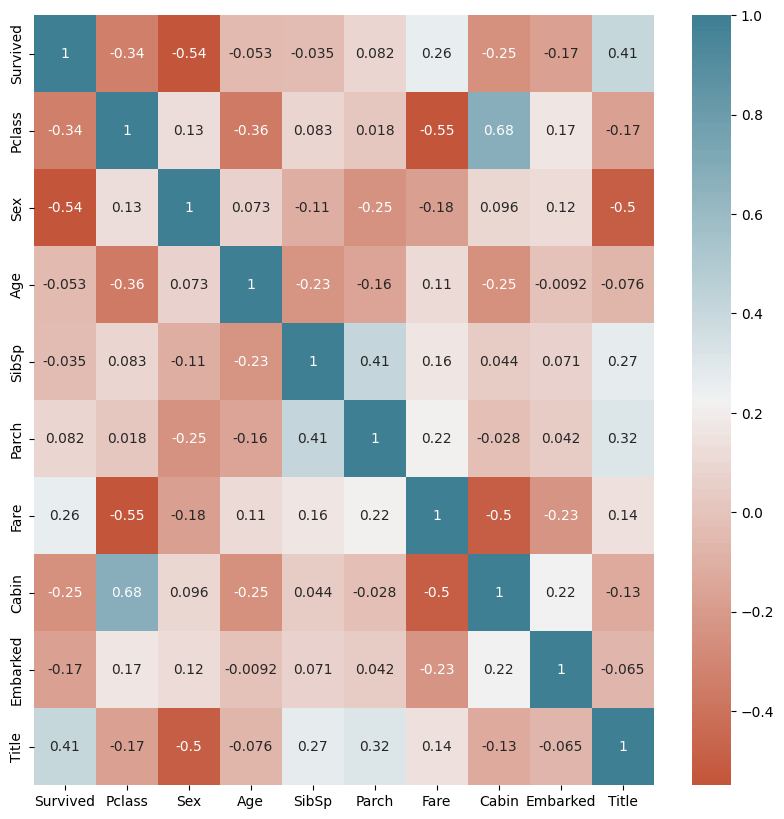

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
df_heatmap = sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200), xticklabels='auto')
# Show correlation matrix between all features.'

In [59]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled.tolist(), columns=df.columns)
# Used StandardScaler to scale all the columns values uniformly

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,-0.789272,0.827377,0.737695,-0.497793,0.432793,-0.473674,-0.502445,0.449479,0.589375,-0.707550
1,1.266990,-1.566107,-1.355574,0.715048,0.432793,-0.473674,0.786845,-1.373462,-1.929248,1.235215
2,1.266990,0.827377,-1.355574,-0.194583,-0.474545,-0.473674,-0.488854,0.449479,0.589375,0.263832
3,1.266990,-1.566107,-1.355574,0.487640,0.432793,-0.473674,0.420730,-2.102638,0.589375,1.235215
4,-0.789272,0.827377,0.737695,0.487640,-0.474545,-0.473674,-0.486337,0.449479,0.589375,-0.707550


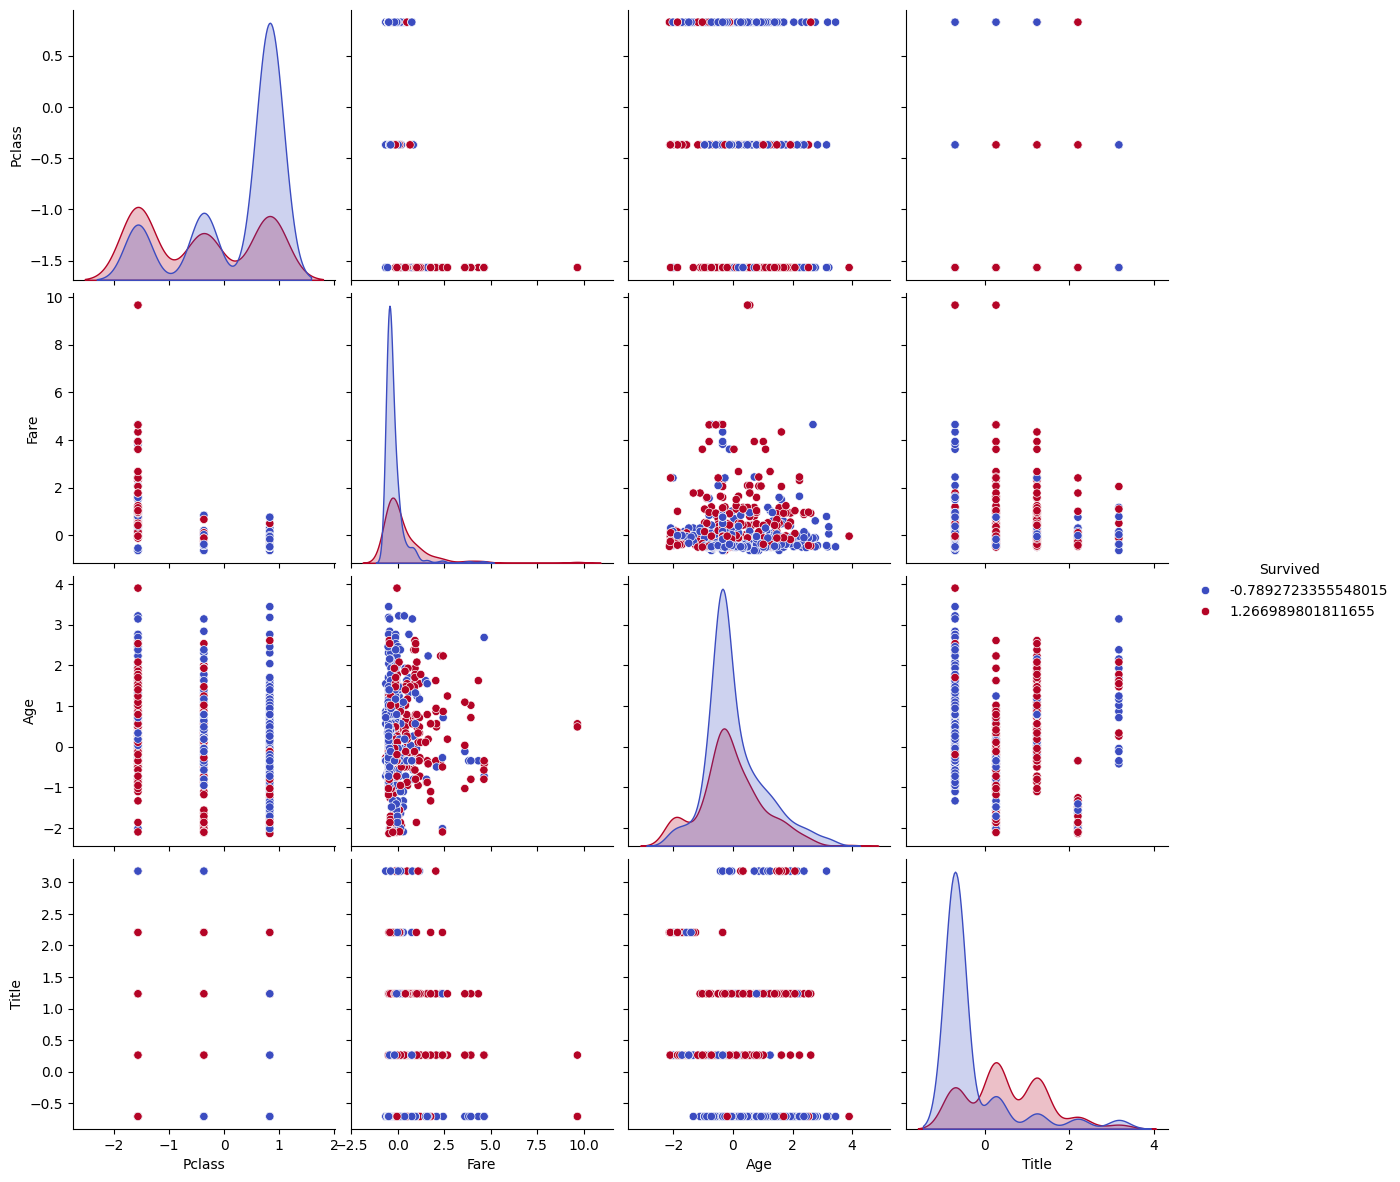

In [61]:
sns.pairplot(df[['Survived','Pclass','Fare','Age', 'Title']], hue='Survived', height=3, palette='coolwarm');
plt.show()
# Used pairplot to show multivariate correlation.

## EDA on provided Titanic dataset, results and findings

### From above pairplot we can deduce following findings:
1. The higher fares or Upper class had a higher chance of survival.
2. Also, from the age graph we can evidence, that young persons had a higher chance to survive as compared to old people.
3. Finally, the survival rate impacted due to gender, older male had higher death rate as compared to young children and females.

### What is the most important factor in determining survival of the Titanic incident?
Looking at the dataset, the most important factor in determining survival during the Titanic incident were Passenger class, Gender, and Age. The captured visualisation shows the class of passenger, more people survived in 1st class than 3rd class passengers.

### In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
Looking at the correlation between columns Pclass, Fare and Survived, people who paid higher price were the one mostly survived. This indicate preferential access to lifeboats was provided, however there is no direct linear positive correlation between the features.

### “Women and children first”. Was this the case?
By examining the survival rates among different genders and age groups, there were higher number of females and children survived than males and older people, so it clear from the data, evidence EDA 'Women and children first' principle was applied during the evacuation process.

### Other observations that can be noted from the dataset.

After performing the EDA on the Titanic dataset, we were able to explore features like 'Embarked' port... most 1st class passengers had traveling from Port Cherbourg as compared to Southampton and Queenstown.

We note highest number of people onboard were from Southampton were from the third class. And, there were no first class passenger boarded from Port Cherbourg.

Also, break down of passengers on board shows highest number of survived, were particular 'Mrs', 'Miss' and 'Master'.